<a href="https://colab.research.google.com/github/MohamedHamed12/AI-Lab/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drug Classification


## data analysis

### Import Need Library

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Read data

In [ ]:
df = pd.read_csv("drug200.csv") # Store data in df variable

In [ ]:
df.head() # print readed data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Check the data to say any failure data

In [ ]:
df.describe() # describe the numberical data ==> min

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df.isnull().sum() # check if any data field is null

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### Info about Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


after these info we see that we will make a data cleanin onl in sex & Dp & Cholesterol field


###Some analysis on age data


In [ ]:
print("Max Age:", df.Age.max()) # min age
print("Min Age:", df.Age.min()) # max age

Max Age: 74
Min Age: 15


- Describe the age

<ipython-input-8-2e0c3d70a438>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


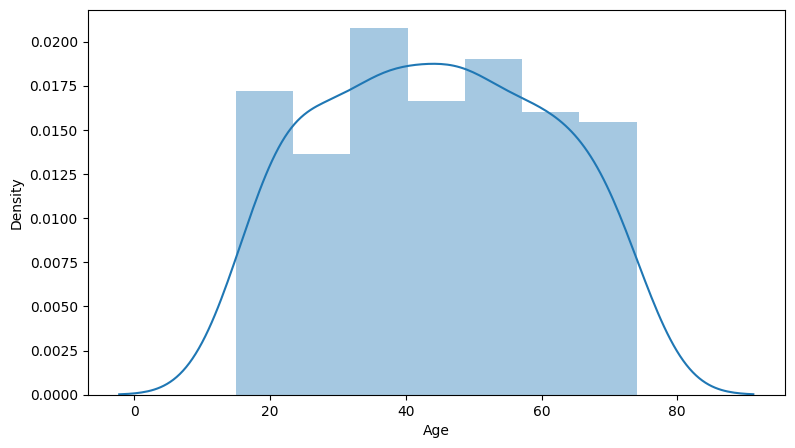

In [ ]:
plt.figure(figsize = (9,5))
sns.distplot(df.Age)
plt.show()

###Some analysis on sex data





- sex Count

In [ ]:
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

- Describe sex

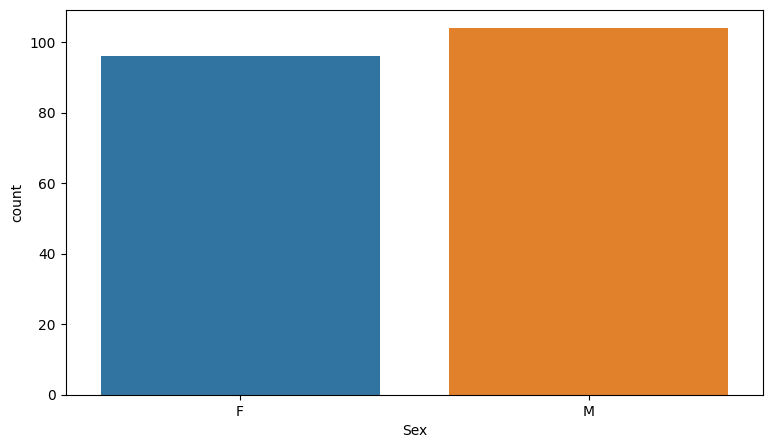

In [ ]:
plt.figure(figsize=(9,5))
sns.countplot(x = df.Sex)
plt.show()

### Some analysis on BP data

- count BP

In [ ]:
df.BP.value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

- Describe BP data

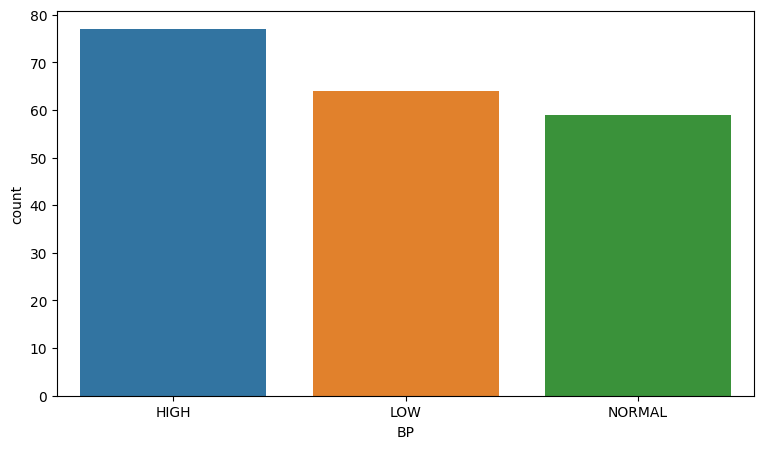

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(x = df.BP)
plt.show()

### Some analysis on cholesterol data

- Count the cholesterol

In [ ]:
df.Cholesterol.value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

- Describe Cholesterol

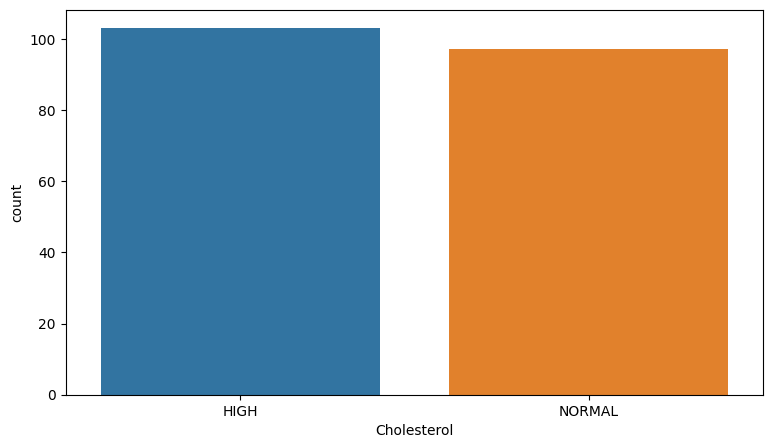

In [ ]:
plt.figure(figsize = (9,5))
sns.countplot(x = df.Cholesterol)
plt.show()

### Some analysis on Na_to_K data

- Count the Na_to_K

In [ ]:
df.Na_to_K.value_counts()

12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: Na_to_K, Length: 198, dtype: int64

- Describe the Na_to_K

<Figure size 900x500 with 0 Axes>

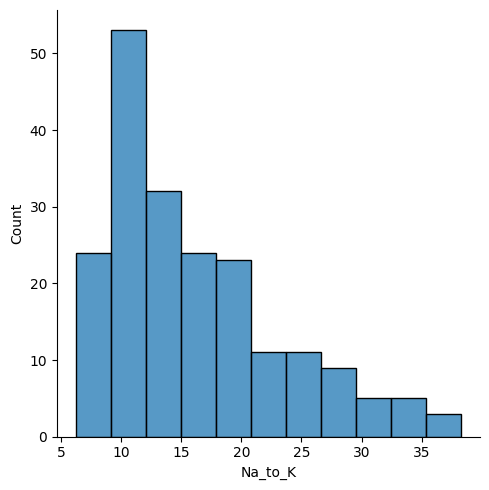

In [ ]:
plt.figure(figsize=(9, 5))
sns.displot(x = df.Na_to_K)
plt.show()

- Notes:
-
  `countplot`: Creates a bar plot to display the counts of observations in different categories of a categorical variable.

- `displot` :(distribution plot): Used for visualizing the distribution of data, including histograms, kernel density plots, and ECDFs, primarily for numerical data.

- `distplot` :(deprecated): Previously used for creating distribution plots, but it is now deprecated, and you should use displot for distribution visualizations in recent versions of Seaborn.

### Some analysis on Drug data

- Count Drug

In [ ]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

- Describe the Drug

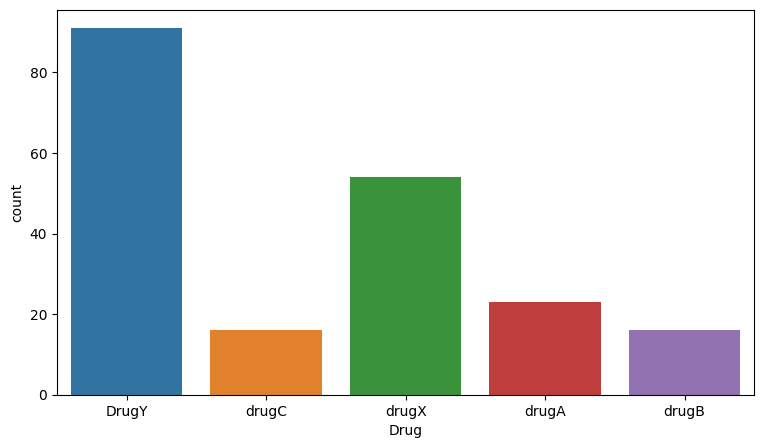

In [ ]:
plt.figure(figsize= ( 9, 5))
sns.countplot(x = df.Drug)
plt.show()

### Encoding data

- Encoding Function

In [ ]:
def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

- Encode string data

In [ ]:
label_list = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in label_list:
    label_encoder(l)

### Show Final Data

- Show data

In [ ]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,167,0
1,47,1,1,0,89,3
2,47,1,1,0,43,3
3,28,0,2,0,10,4
4,61,0,1,0,133,0


- Download data

In [ ]:
df.to_csv("MohamedYousef.csv")

## KNN

### library and read data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
df1=pd.read_csv("cleaned_data.csv")
df1.head()

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,0,0,0,167,0
1,1,47,1,1,0,89,3
2,2,47,1,1,0,43,3
3,3,28,0,2,0,10,4
4,4,61,0,1,0,133,0


### split data

In [ ]:
from sklearn.model_selection import train_test_split

x = df1.drop(["Drug"],axis=1)
y = df1.Drug

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42, shuffle = True)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)




x_train shape: (140, 6)
x_test shape: (60, 6)
y_train shape: (140, 1)
y_test shape: (60, 1)


### knn default

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(x_test,y_test))

Train Score: 0.6714285714285715
Test Score: 0.6


### knn gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid = {'n_neighbors':np.arange(1,120),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn = KNeighborsClassifier(algorithm = "auto")
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(x_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print("Test Score:",knn_cv.score(x_test,y_test))

Hyperparameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Train Score: 0.7285714285714286
Test Score: 0.6666666666666666


## SVM